<a href="https://colab.research.google.com/github/Jairosandoval/3_deeplearning/blob/main/DS_opiniones_Usa_Elon_Trump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de librerias

In [48]:
import pandas as pd
import numpy as np
import spacy
import gzip
import json
import gzip
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob #Esta me permite hacer el analisis de sentimiento
from tqdm import tqdm
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura del archivo desde drive

In [2]:
df_coments_usa = pd.read_csv('/content/drive/MyDrive/Data science 2/for_export.csv')

print(df_coments_usa.head()) # Que me de las primeras 5 filas

             pseudo_id                                               text  \
0  5887388747697408176  $DONALD #TRUMP $ELON #MUSK #DONALD $TRUMP #ELO...   
1  5033222628209363717  Here we are🥳\n#victory\n#trump\n#musk\n#kamala...   
2  1948414991925021503  $DONALD #TRUMP $ELON #MUSK #DONALD $TRUMP #ELO...   
3  7806877883802699279  For those who play wordle, I have it on good a...   
4  7628987960427221856  Do you known the face of bitcoin, it as simila...   

   retweetCount  replyCount  likeCount  quoteCount  viewCount  bookmarkCount  \
0             0           0          0           0        308              0   
1             0           0          0           0         61              0   
2             0           0          0           0        321              0   
3             0           0          0           0         31              0   
4             0           2          7           0        470              1   

                   createdAt lang  isReply pseudo_inRepl

# Anàlisis previo exploratorio


In [3]:
df_coments_usa.head()

,pseudo_id,text,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,createdAt,lang,isReply,pseudo_inReplyToId,pseudo_conversationId,pseudo_inReplyToUserId,pseudo_author_id,author_location,author_followers,author_following,author_isVerified,author_isBlueVerified
0,5887388747697408176,$DONALD #TRUMP $ELON #MUSK #DONALD $TRUMP #ELO...,0,0,0,0,308,0,2025-01-19 05:08:23+00:00,qme,False,<NA>,5887388747697408176,<NA>,7388410502928864627,NaN,22,7,False,True
1,5033222628209363717,Here we are🥳\n#victory\n#trump\n#musk\n#kamala...,0,0,0,0,61,0,2025-01-19 05:09:08+00:00,en,False,<NA>,5033222628209363717,<NA>,2826146116600528502,NaN,1,6,False,False
2,1948414991925021503,$DONALD #TRUMP $ELON #MUSK #DONALD $TRUMP #ELO...,0,0,0,0,321,0,2025-01-19 05:09:17+00:00,qme,False,<NA>,1948414991925021503,<NA>,7388410502928864627,NaN,22,7,False,True
3,7806877883802699279,"For those who play wordle, I have it on good a...",0,0,0,0,31,0,2025-01-19 05:10:29+00:00,en,False,<NA>,7806877883802699279,<NA>,8959845374198512935,Great Southern Land,7,18,False,False
4,7628987960427221856,"Do you known the face of bitcoin, it as simila...",0,2,7,0,470,1,2025-01-19 05:13:22+00:00,en,False,<NA>,7628987960427221856,<NA>,5222197761515556720,NaN,131,935,False,False


In [4]:
# Ver nombres de las columnas
print("\n📌 Columnas disponibles:")
print(df_coments_usa.columns)



📌 Columnas disponibles:
Index(['pseudo_id', 'text', 'retweetCount', 'replyCount', 'likeCount',
       'quoteCount', 'viewCount', 'bookmarkCount', 'createdAt', 'lang',
       'isReply', 'pseudo_inReplyToId', 'pseudo_conversationId',
       'pseudo_inReplyToUserId', 'pseudo_author_id', 'author_location',
       'author_followers', 'author_following', 'author_isVerified',
       'author_isBlueVerified'],
      dtype='object')


In [5]:
# Ver cantidad de registros
print(f"\n📊 Número de tweets: {len(df_coments_usa)}")


📊 Número de tweets: 465769


In [6]:
# Verifico valores nulos por columna
print("\nValores nulos por columna:\n", df_coments_usa.isnull().sum())



Valores nulos por columna:
 pseudo_id                      0
text                           0
retweetCount                   0
replyCount                     0
likeCount                      0
quoteCount                     0
viewCount                      0
bookmarkCount                  0
createdAt                      0
lang                           0
isReply                        0
pseudo_inReplyToId             0
pseudo_conversationId          0
pseudo_inReplyToUserId         0
pseudo_author_id               0
author_location           204973
author_followers               0
author_following               0
author_isVerified              0
author_isBlueVerified          0
dtype: int64


# Proceso de ETL


In [7]:
#Voy a eliminar la columna author_location

df = df_coments_usa.drop(columns=["author_location"])

# Verifico que se haya eliminado
print("\n📌 Columnas después de eliminar 'author_location':")
print(df.columns)


📌 Columnas después de eliminar 'author_location':
Index(['pseudo_id', 'text', 'retweetCount', 'replyCount', 'likeCount',
       'quoteCount', 'viewCount', 'bookmarkCount', 'createdAt', 'lang',
       'isReply', 'pseudo_inReplyToId', 'pseudo_conversationId',
       'pseudo_inReplyToUserId', 'pseudo_author_id', 'author_followers',
       'author_following', 'author_isVerified', 'author_isBlueVerified'],
      dtype='object')


In [8]:
# Seleccionar las columnas relevantes
columnas_relevantes = [
    "pseudo_id", "text", "retweetCount", "replyCount", "likeCount",
    "viewCount", "author_followers", "author_following"
]

# Creo nuevo DataFrame reducido
df_reduced = df[columnas_relevantes].copy()

# Guardo el nuevo dataset con las columnas seleccionadas que me interesan mas
df_reduced.to_csv("tweets_reduced.csv", index=False)

# Cargo el nuevo dataset reducido
df = pd.read_csv("tweets_reduced.csv")

# Verifico de nuevo
print(df.head())


             pseudo_id                                               text  \
0  5887388747697408176  $DONALD #TRUMP $ELON #MUSK #DONALD $TRUMP #ELO...   
1  5033222628209363717  Here we are🥳\n#victory\n#trump\n#musk\n#kamala...   
2  1948414991925021503  $DONALD #TRUMP $ELON #MUSK #DONALD $TRUMP #ELO...   
3  7806877883802699279  For those who play wordle, I have it on good a...   
4  7628987960427221856  Do you known the face of bitcoin, it as simila...   

   retweetCount  replyCount  likeCount  viewCount  author_followers  \
0             0           0          0        308                22   
1             0           0          0         61                 1   
2             0           0          0        321                22   
3             0           0          0         31                 7   
4             0           2          7        470               131   

   author_following  
0                 7  
1                 6  
2                 7  
3                18  


#Detecciòn de idiomas y tratamiento

In [9]:
pip install langdetect #Ejeduto esta libreria para detectar el idioma de los comentarios.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=2bddc22c018a743aed1b4642b2a28b4ae186fbef446c0bdce447ae1bc325efec
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [10]:
from langdetect import detect
import pandas as pd
from tqdm import tqdm

# Aplico la función para detectar el idioma de un tweet
def detectar_idioma(texto):
    try:
        return detect(texto)  # Esto me devuelve el código del idioma ('en' para inglés, 'es' para español)
    except:
        return "unknown"  # Si falla la detección, se marca como desconocido

# Agrego la barra de progreso
tqdm.pandas()

# Aplico ahora la detección de idioma a la columna "text"
df["lang"] = df["text"].progress_apply(detectar_idioma)

# Ahora veo la deteccion de idiomas
print("\n📌 Distribución de idiomas detectados:")
print(df["lang"].value_counts())


100%|██████████| 465769/465769 [41:44<00:00, 186.00it/s]


📌 Distribución de idiomas detectados:
lang
en         296523
es          32526
fr          25033
pt          24346
de          20153
it          11203
nl           7091
id           4673
tr           4280
sv           3683
no           3524
pl           3070
et           3017
fi           2698
ca           2297
da           2190
ro           2098
ar           2064
af           1554
vi           1538
hr           1274
tl           1002
cs            942
el            873
so            863
ja            858
hi            834
sw            651
unknown       649
sl            602
ur            415
zh-cn         366
cy            362
hu            315
sk            284
fa            255
lv            246
ko            243
th            194
sq            178
ru            169
lt            140
ta            118
ne             57
te             47
mr             45
bn             42
ml             39
he             38
uk             31
bg             21
gu             18
kn             14
zh

In [11]:
#Ahora voy a fitrar los comentarios que son solo en español

df = df[df["lang"] == "es"]

#Ahora veo cuantos tweets quedan despues de filtarlo por idioma

print(f"\n✅ Tweets después del filtrado por idioma español: {len(df)}")


✅ Tweets después del filtrado por idioma español: 32526


# Anàlisis de sentiment

In [12]:
#Instalo la libreria VADER que me sirve para leer el sentiment de los tweets

!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


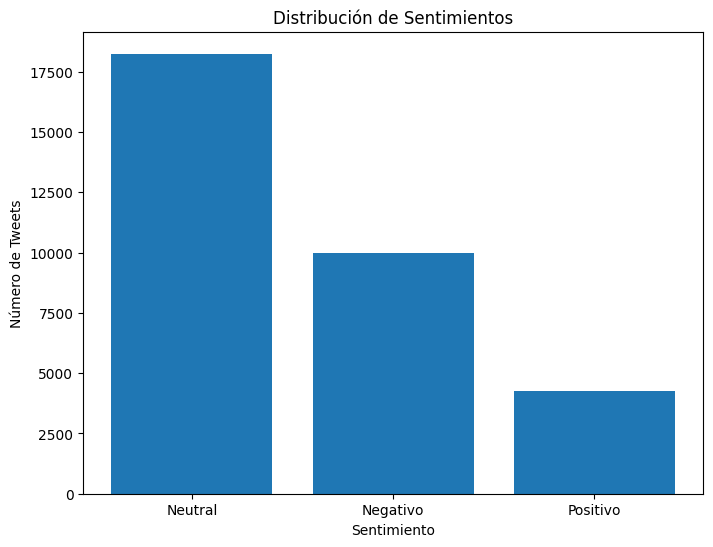

In [13]:
#Instalo la libreria VADER que me sirve para leer el sentiment de los tweets

!pip install vaderSentiment
# %%
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # Importa la clase SentimentIntensityAnalyzer

# Inicializo el analizador de sentimiento
analyzer = SentimentIntensityAnalyzer()

# Funcion que me permite leer el sentimiento
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Agrego una nueva columna llamada 'sentiment_score' al DataFrame
df['sentiment_score'] = df['text'].apply(get_sentiment)

# Clasifico ahora el sentimiento
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positivo'
    elif score <= -0.05:
        return 'Negativo'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

# Gráfico de distribución de sentimientos
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Tweets')
plt.show()

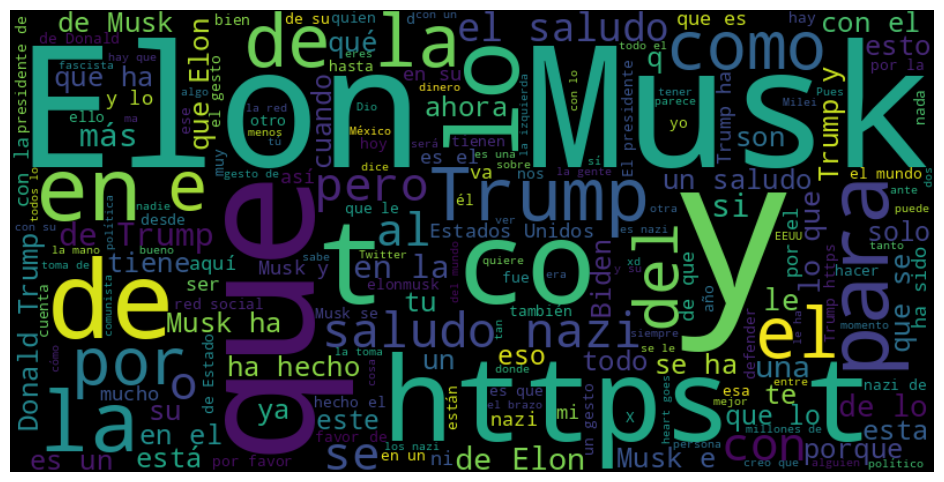

In [14]:
import matplotlib.pyplot as plt
#Nube de palabras (para las reseñas con sentimiento positivo)
positive_reviews = df[df['sentiment'] == 'Positivo']['text']
text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Segunda limpieza (ETL)

In [33]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descargo corpus porque no lo tengo
nltk.download('stopwords')

# Armo lista de "noise words"
noise_words = []

# Stopwords en español
stopwords_es = nltk.corpus.stopwords.words('spanish')
noise_words.extend(stopwords_es)

# Agrego manualmente palabras no deseadas
extras = ['https', 'rt', 'tco', 'Trump', 'Musk', 'presidente', 'día', 'año']  # ejemplo
noise_words.extend(extras)

# Pasarlo a set para usar en WordCloud
noise_words_set = set(noise_words)

print(f"🧹 Total de noise words: {len(noise_words_set)}")


🧹 Total de noise words: 321


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
df['sentiment']


,sentiment
311,Positivo
424,Neutral
426,Negativo
472,Neutral
477,Neutral
...,...
465627,Negativo
465633,Positivo
465640,Neutral
465672,Positivo


In [36]:
from nltk.corpus import stopwords
import string

# Stopwords en español
noise_words = set(stopwords.words('spanish'))

# Palabras comunes, irrelevantes o muy repetitivas que no aportan valor
extras = [
    'rt', 'https', 'http', 'tco', 'co', 'amp',
    'Trump', 'Musk', 'donald', 'elon', 'biden', 'joe',
    'presidente', 'elecciones', 'día', 'hoy', 'año', 'vez', 'gente',
    'q', 'x', 'va', 'ser', 'si', 'solo', 'saludo', 'musk','trump'
]

# Agregar puntuación
extras += list(string.punctuation)

# Unir todo en un solo set
noise_words.update(extras)



In [37]:
import re

# Función para limpiar el texto
def limpiar_texto(texto):
    texto = texto.lower()  # paso a minúsculas
    texto = re.sub(r"http\S+|www\S+|https\S+", '', texto)  # elimino URLs
    texto = re.sub(r'@\w+', '', texto)  # elimino menciones
    texto = re.sub(r'#\w+', '', texto)  # elimino  hashtags
    texto = re.sub(r'\d+', '', texto)  # elimino  números
    texto = re.sub(r'[^\w\s]', '', texto)  # elimino  signos de puntuación
    palabras = texto.split()
    palabras_limpias = [p for p in palabras if p not in noise_words]
    return ' '.join(palabras_limpias)

# Aplico limpieza
df["text_limpio"] = df["text"].apply(limpiar_texto)

# Ver resultado de ejemplo
print(df[["text", "text_limpio"]].sample(30))


                                                     text  \
63132   @EvilAFM Pero de verdad crees que Elon Musk es...   
34695   @Esquimal_Dark Està más cerca de Trump que de ...   
271943  @David_qva La pregunta es volverán a encarcela...   
252999  @roitele1 A mí me parece que Musk quiso signif...   
34087   #Internacionales 🔴| Argentina felicita a Trump...   
163874  De que Elon Musk sea fascista no tengo la meno...   
378838  Más de 20 #estados demandaron a #Trump por eli...   
322955  "Lo único que está haciendo Trump es ser congr...   
239332  Con lo de musk dando vuelta, es una buena chan...   
106599  Solo a los hijos de putr@@s de la izquierda na...   
79636   Una década marcada por liderazgos envejecidos:...   
171394  @ischargro Vos tmb te sumaste a lo del nazismo...   
385577  @ajmechet @elonmusk Soy católico y pido porque...   
105823  Hablar sobre Elon Musk no significa que seamos...   
28499   El discurso de Trump refleja una vez más que e...   
249816  kskkdksksk cuand

# Segunda visulizaciòn de nube de palabras

#Segunda nube de palabras

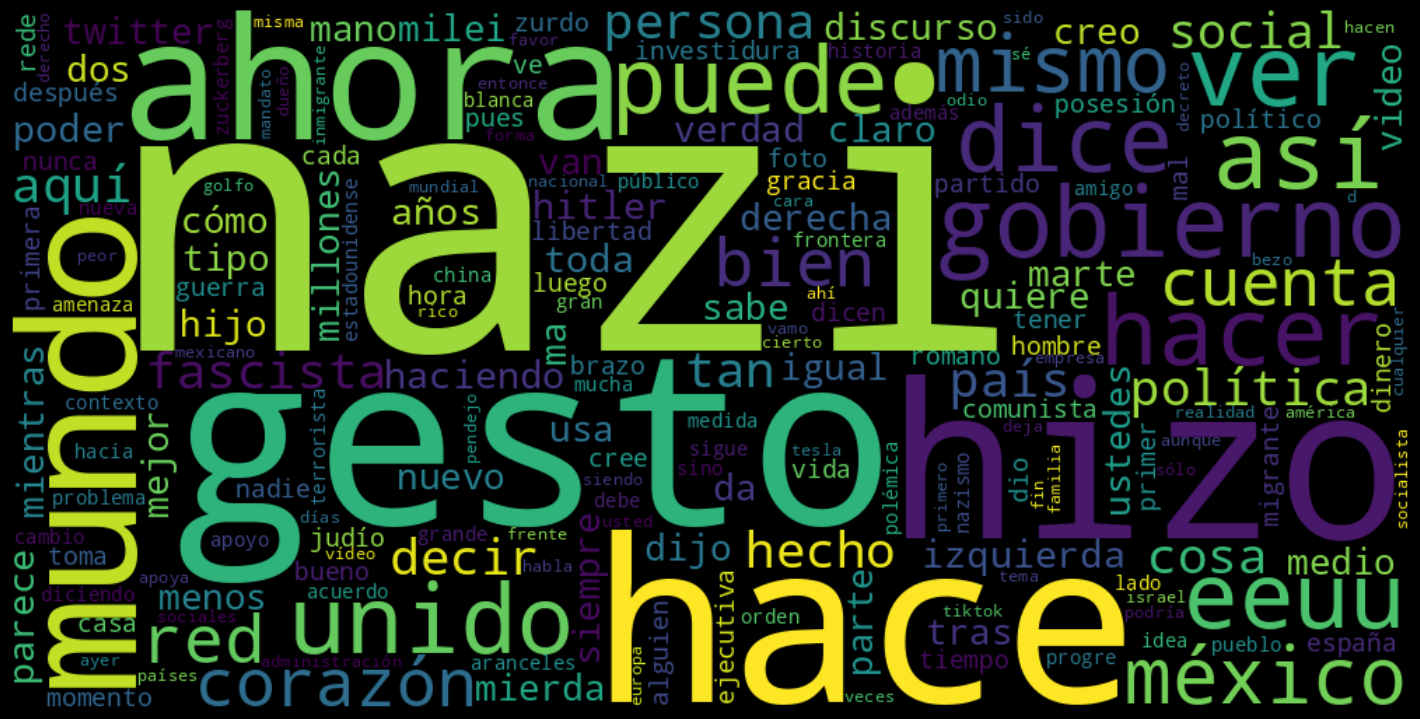

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unir todos los textos limpios en un solo string
texto_total = ' '.join(df["text_limpio"])

# Crear y mostrar la nube de palabras
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='black',
    max_words=200,  # opcional: limitar cantidad de palabras
    collocations=False  # evita que agrupe palabras frecuentes juntas (como bigramas)
).generate(texto_total)

plt.figure(figsize=(14, 7), facecolor='black')  # Fondo del lienzo negro
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


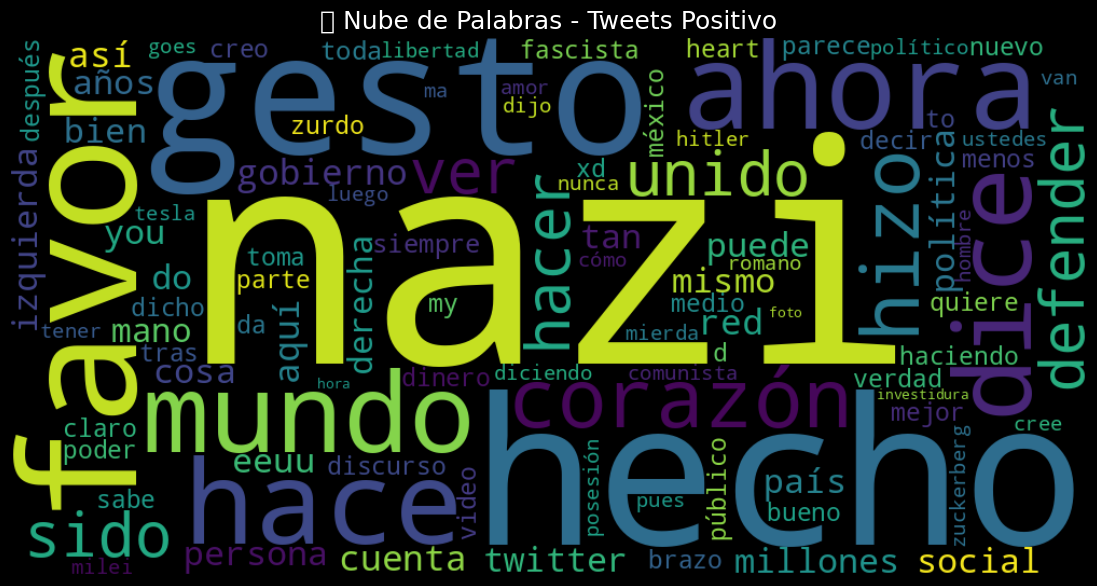

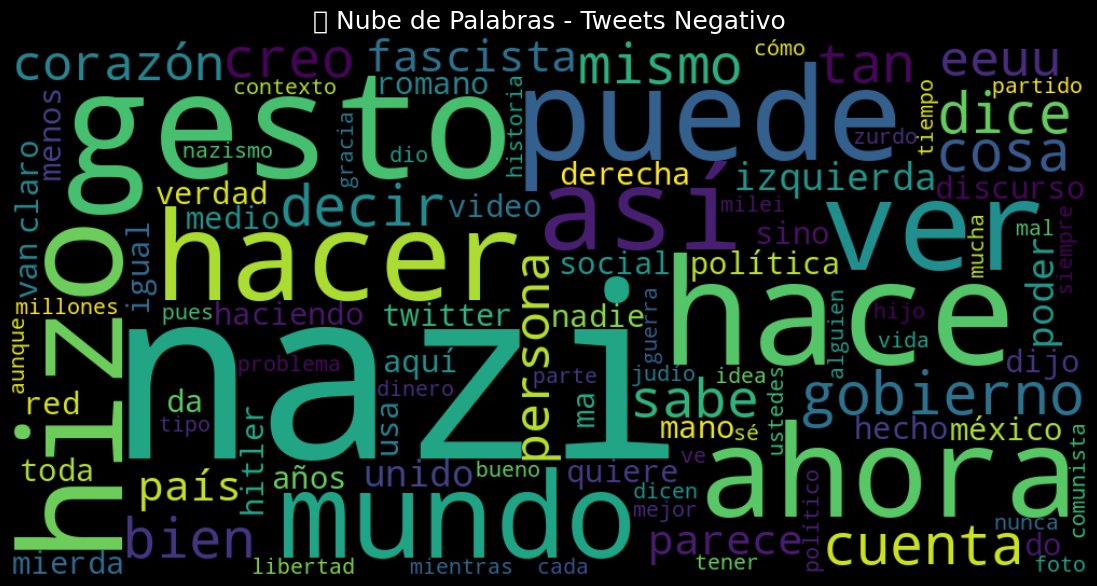

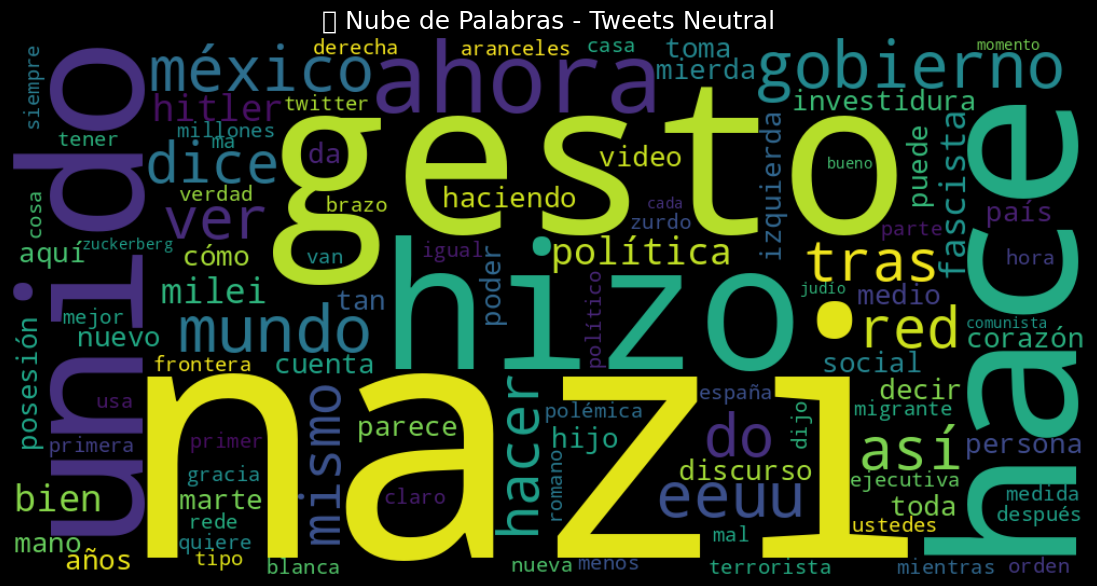

In [21]:


# Función para generar una nube de palabras
def generar_nube(sentimiento, color_fondo="black", color_titulo="white"):
    texto = ' '.join(df[df["sentiment"] == sentimiento]["text_limpio"])
    wordcloud = WordCloud(
        width=1000,
        height=500,
        background_color=color_fondo,
        max_words=100,
        collocations=False,
        stopwords=noise_words_set
    ).generate(texto)

    plt.figure(figsize=(14, 7), facecolor=color_fondo)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"🌤️ Nube de Palabras - Tweets {sentimiento}", fontsize=18, color=color_titulo)
    plt.show()

# Generar las tres nubes
generar_nube("Positivo")
generar_nube("Negativo")
generar_nube("Neutral")


In [39]:
from collections import Counter

# Función para obtener las N palabras más comunes por sentimiento
def obtener_palabras_frecuentes(sentimiento, top_n=20):
    texto = ' '.join(df[df["sentiment"] == sentimiento]["text_limpio"])
    palabras = texto.split()
    conteo = Counter(palabras)
    return conteo.most_common(top_n)

# Obtener y mostrar resultados
print("🔴 Palabras más comunes en tweets NEGATIVOS:")
print(obtener_palabras_frecuentes("Negativo"))

print("\n🟦 Palabras más comunes en tweets NEUTRALES:")
print(obtener_palabras_frecuentes("Neutral"))

print("\n🟩 Palabras más comunes en tweets POSITIVOS:")
print(obtener_palabras_frecuentes("Positivo"))




🔴 Palabras más comunes en tweets NEGATIVOS:
[('nazi', 2572), ('hace', 710), ('hizo', 689), ('gesto', 685), ('ver', 543), ('ahora', 542), ('hacer', 513), ('mundo', 478), ('puede', 477), ('así', 462), ('nazis', 450), ('gobierno', 416), ('decir', 392), ('creo', 375), ('tan', 375), ('bien', 363), ('dice', 357), ('corazón', 348), ('eeuu', 341), ('mismo', 319)]

🟦 Palabras más comunes en tweets NEUTRALES:
[('nazi', 2663), ('gesto', 795), ('hace', 669), ('hizo', 665), ('unidos', 614), ('ahora', 597), ('mundo', 566), ('gobierno', 546), ('eeuu', 527), ('méxico', 518), ('ver', 466), ('así', 450), ('nazis', 447), ('tras', 436), ('hacer', 416), ('red', 408), ('dice', 371), ('bien', 364), ('hitler', 362), ('milei', 351)]

🟩 Palabras más comunes en tweets POSITIVOS:
[('nazi', 805), ('hecho', 305), ('gesto', 272), ('favor', 259), ('ahora', 217), ('hace', 192), ('mundo', 185), ('corazón', 169), ('hizo', 162), ('sido', 157), ('hacer', 155), ('unidos', 155), ('ver', 155), ('dice', 154), ('defender', 152

Notando que la palabra "nazi" no distingue entre positivo y neutral, paso a hacer un ajuste manual para que excluya esta palabra en dichos sentiments

In [40]:
import re

# Función para eliminar solo "nazi", "nazis", "saludo", "saludos"
def eliminar_palabras_especificas(texto):
    if isinstance(texto, str):
        return re.sub(r'\b(nazi|nazis|saludo|saludos)\b', '', texto, flags=re.IGNORECASE)
    return texto

# Aplicar limpieza solo en tweets Positivos y Neutrales
df.loc[df["sentiment"].isin(["Positivo", "Neutral"]), "text_limpio"] = df.loc[
    df["sentiment"].isin(["Positivo", "Neutral"]), "text_limpio"
].apply(eliminar_palabras_especificas)


# TOP de comentarios por sentiment

In [41]:
# Ver 5 comentarios negativos
print("\n🔴 Comentarios Negativos:")
print(df[df["sentiment"] == "Negativo"]["text"].sample(20, random_state=1).to_string(index=False))

# Ver 5 comentarios neutrales
print("\n🟧 Comentarios Neutrales:")
print(df[df["sentiment"] == "Neutral"]["text"].sample(20, random_state=2).to_string(index=False))

# Ver 5 comentarios positivos
print("\n🟢 Comentarios Positivos:")
print(df[df["sentiment"] == "Positivo"]["text"].sample(20, random_state=3).to_string(index=False))



🔴 Comentarios Negativos:
Apoyan a #Trump lo q implica q los costos de ga...
@FreddyOliviery Sí a Elon Musk no le importan l...
@larepublica_pe #Peru no te dejes engañar mas p...
@zooliberalismo @jor_jorj @AntonioMaestre No di...
Puede que Musk haya hecho ese gesto nazi con o ...
Hombre, neuronas no les faltan a estos, sólo qu...
No entiendo por qué le llaman Elon Musk al nazi...
Elon Musk podria matar a Indiana Jones en plena...
No es obligatorio saber qué significa el gesto ...
@peru21noticias Tan desesperado está este pasqu...
Las mujeres fueron consideradas como “grupos ma...
@vitoquiles Me imagino que Elon Musk, debe de e...
@AlertaNews24 Pedro Sánchez moviliza un boycott...
@unaicano10 Si no os creíais q esta gente eran ...
@platanozombi @EvilAFM no tengo a elon musk de ...
Parece a que a la comunidad un nazi millonario ...
@GustavoBolivar Confundir para engañar como Oba...
Elon Musk causó indignación el lunes por haber ...
@GUSI_ESESOYYO @realDonaldTrump @elonmusk A Tru...
@edua

In [42]:
# Top 10 comentarios más retuiteados por sentimiento
for s in ["Positivo", "Negativo", "Neutral"]:
    print(f"\n⭐ Top retuits - {s}")
    top = df[df["sentiment"] == s].sort_values("retweetCount", ascending=False).head(10)
    print(top[["retweetCount", "text"]].to_string(index=False))



⭐ Top retuits - Positivo
 retweetCount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               text
         1116                                                                                                                                                                                                                                                                                                                                                                                                                        Lo de los progres acusando a Elon Musk d

# Top de palabras mas usadas por sentiment

In [43]:
from collections import Counter

# Función para obtener las N palabras más comunes por sentimiento
def obtener_palabras_frecuentes(sentimiento, top_n=20):
    texto = ' '.join(df[df["sentiment"] == sentimiento]["text_limpio"])
    palabras = texto.split()
    conteo = Counter(palabras)
    return conteo.most_common(top_n)

# Obtengo y muestro resultados
print("🔴 Palabras más comunes en tweets NEGATIVOS:")
print(obtener_palabras_frecuentes("Negativo"))

print("\n🟦 Palabras más comunes en tweets NEUTRALES:")
print(obtener_palabras_frecuentes("Neutral"))

print("\n🟩 Palabras más comunes en tweets POSITIVOS:")
print(obtener_palabras_frecuentes("Positivo"))


🔴 Palabras más comunes en tweets NEGATIVOS:
[('nazi', 2572), ('hace', 710), ('hizo', 689), ('gesto', 685), ('ver', 543), ('ahora', 542), ('hacer', 513), ('mundo', 478), ('puede', 477), ('así', 462), ('nazis', 450), ('gobierno', 416), ('decir', 392), ('creo', 375), ('tan', 375), ('bien', 363), ('dice', 357), ('corazón', 348), ('eeuu', 341), ('mismo', 319)]

🟦 Palabras más comunes en tweets NEUTRALES:
[('gesto', 795), ('hace', 669), ('hizo', 665), ('unidos', 614), ('ahora', 597), ('mundo', 566), ('gobierno', 546), ('eeuu', 527), ('méxico', 518), ('ver', 466), ('así', 450), ('tras', 436), ('hacer', 416), ('red', 408), ('dice', 371), ('bien', 364), ('hitler', 362), ('milei', 351), ('investidura', 344), ('aquí', 344)]

🟩 Palabras más comunes en tweets POSITIVOS:
[('hecho', 305), ('gesto', 272), ('favor', 259), ('ahora', 217), ('hace', 192), ('mundo', 185), ('corazón', 169), ('hizo', 162), ('sido', 157), ('hacer', 155), ('unidos', 155), ('ver', 155), ('dice', 154), ('defender', 152), ('así',

In [44]:
def obtener_frecuentes(sentimiento, top_n=10):
    palabras = ' '.join(df[df['sentiment'] == sentimiento]['text_limpio']).split()
    conteo = Counter(palabras)
    return conteo.most_common(top_n)

# Obtengo los top 10 por grupo
top_positivo = obtener_frecuentes("Positivo")
top_negativo = obtener_frecuentes("Negativo")
top_neutral = obtener_frecuentes("Neutral")


In [45]:
# Convierto cada lista a DataFrame
df_positivo = pd.DataFrame(top_positivo, columns=["palabra", "frecuencia"])
df_positivo["sentimiento"] = "Positivo"

df_negativo = pd.DataFrame(top_negativo, columns=["palabra", "frecuencia"])
df_negativo["sentimiento"] = "Negativo"

df_neutral = pd.DataFrame(top_neutral, columns=["palabra", "frecuencia"])
df_neutral["sentimiento"] = "Neutral"

# Ahora lo uno en uno solo
df_palabras = pd.concat([df_positivo, df_negativo, df_neutral])


<ipython-input-49-3ae12c26d0b7>:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


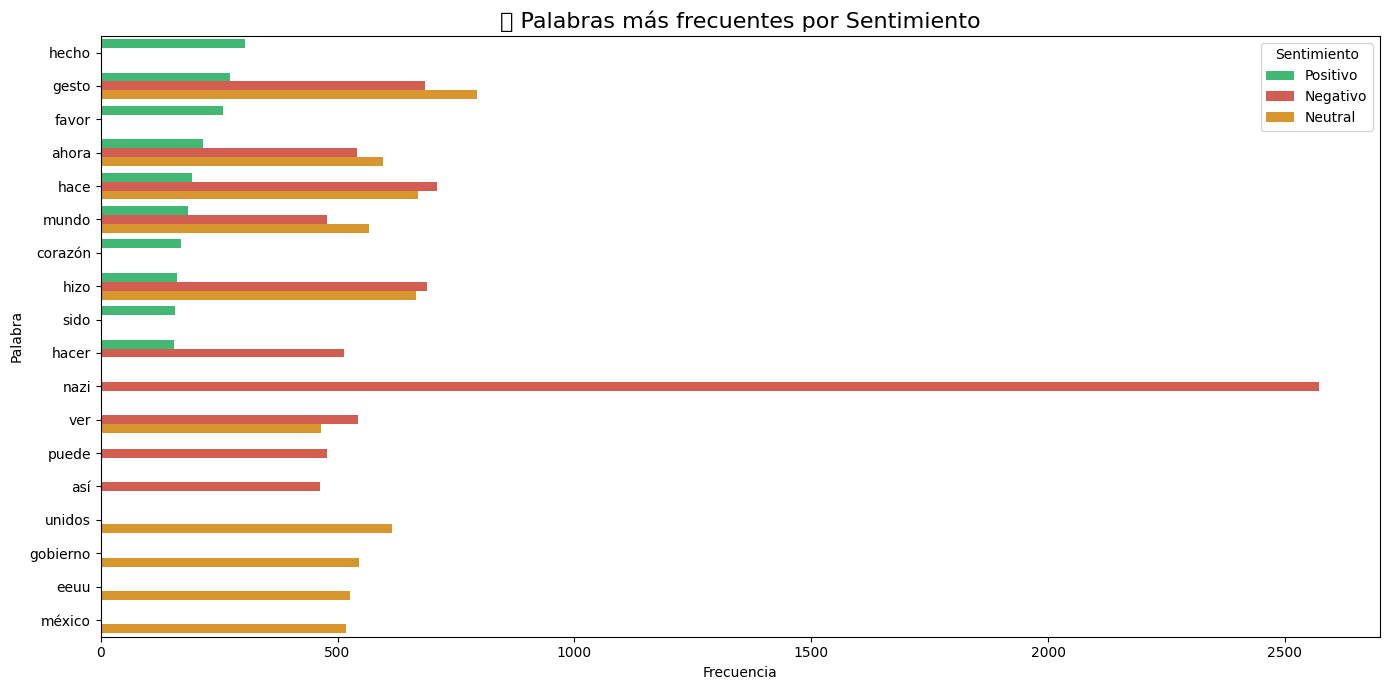

In [49]:

plt.figure(figsize=(14, 7))

# Mapeo de colores personalizados por tipo de sentimiento
colores = {
    "Positivo": "#2ecc71",  # verde
    "Neutral": "#f39c12",   # naranja
    "Negativo": "#e74c3c"   # rojo
}

sns.barplot(
    data=df_palabras,
    x="frecuencia",
    y="palabra",
    hue="sentimiento",
    dodge=True,
    palette=colores  # 🎨 personalizo los coloares
)

plt.title("📊 Palabras más frecuentes por Sentimiento", fontsize=16)
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.legend(title="Sentimiento")
plt.tight_layout()
plt.show()



# Entrenamiento de red neuronal simple que me clasifique los tweets

1.👉 Preparaciòn de datos:



*  Uso **tex_limpio** y **sentiment** como input/salida.
* Convertir el texto en vectores con **Tokenizer** y **pad_sequences**



In [50]:
import tensorflow as tf # Instalo esta librerìa que me perdimte trabajar con redes neuronales modernas, tales como:
#Embeddings
#LSTM/GRU si más adelante querés
#Entrenamiento con GPU si estás en Colab
#Funcionalidades de evaluación y visualización

print(tf.__version__)


2.18.0


Tokenizamos el texto


*   Convertimos sentimientos en etiquetas numèricas
*   dividimos test y train
* armamos la red





In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1️⃣ Parámetros base
max_words = 10000       # número máximo de palabras en el vocabulario
max_len = 100           # longitud máxima de las secuencias

# 2️⃣ Tokenización del texto limpio
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text_limpio"])
sequences = tokenizer.texts_to_sequences(df["text_limpio"])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# 3️⃣ Codificar las etiquetas (Positivo, Negativo, Neutral)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df["sentiment"])  # → convierte a 0, 1, 2

# 4️⃣ División en train y test
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

print("✅ Datos preparados:")
print(f"Entrenamiento: {len(X_train)} muestras")
print(f"Test: {len(X_test)} muestras")


✅ Datos preparados:
Entrenamiento: 26020 muestras
Test: 6506 muestras


2.👉 Paso 2: Armar y entrenar la red neuronal



*  Embedding layer → capa oculta → softmax
* Categorización multiclase (3 clases)

Es decir, harè asi:
 Input → Embedding → GlobalAveragePooling → Dense → Output (softmax)


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.utils import to_categorical # Import to_categorical

# Convierto etiquetas a one-hot (porque es clasificación multiclase)
num_clases = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_clases)
y_test_cat = to_categorical(y_test, num_clases)

# Creo el modelo secuencial
modelo = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(num_clases, activation='softmax')
])

# Compilo ahora el modelo
modelo.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Entreno  el modelo
historial = modelo.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test_cat),
    verbose=2
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
204/204 - 5s - 26ms/step - accuracy: 0.5608 - loss: 0.9450 - val_accuracy: 0.5642 - val_loss: 0.9319
Epoch 2/10
204/204 - 2s - 11ms/step - accuracy: 0.5799 - loss: 0.9140 - val_accuracy: 0.6210 - val_loss: 0.8788
Epoch 3/10
204/204 - 3s - 17ms/step - accuracy: 0.6398 - loss: 0.8456 - val_accuracy: 0.5470 - val_loss: 0.9307
Epoch 4/10
204/204 - 4s - 20ms/step - accuracy: 0.6757 - loss: 0.7821 - val_accuracy: 0.6563 - val_loss: 0.8246
Epoch 5/10
204/204 - 2s - 11ms/step - accuracy: 0.6984 - loss: 0.7400 - val_accuracy: 0.6617 - val_loss: 0.8251
Epoch 6/10
204/204 - 3s - 12ms/step - accuracy: 0.7179 - loss: 0.6941 - val_accuracy: 0.6958 - val_loss: 0.7700
Epoch 7/10
204/204 - 3s - 14ms/step - accuracy: 0.7440 - loss: 0.6396 - val_accuracy: 0.6792 - val_loss: 0.7909
Epoch 8/10
204/204 - 3s - 16ms/step - accuracy: 0.7614 - loss: 0.6067 - val_accuracy: 0.7104 - val_loss: 0.7120
Epoch 9/10
204/204 - 2s - 11ms/step - accuracy: 0.7799 - loss: 0.5632 - val_accuracy: 0.7107 - val_loss:

que me dice esto?

Epoch X/Y
**[train steps] - [tiempo]** - accuracy: **[precisión en entrenamiento]** - loss: **[pérdida en entrenamiento]** - val_accuracy: **[precisión en validación]** - val_loss: **[pérdida en validación]**



Métrica	Valor en Epoch 10	¿Qué significa?
accuracy	0.7579	El modelo acierta el 75.8% de las predicciones en los datos de entrenamiento.
loss	0.6160	La función de pérdida (categorical crossentropy) en entrenamiento está bajando — ¡bien!
val_accuracy	0.6651	El modelo acierta el 66.5% de las predicciones en los datos de validación (no vistos).
val_loss	0.8238	La pérdida en validación también bajó desde el inicio.


👁 OJO:
En epoch 8-10 el val_loss empieza a subir un poquito, eso puede ser señal de overfitting leve, pero es normal si no empeora mucho el val_accuracy.

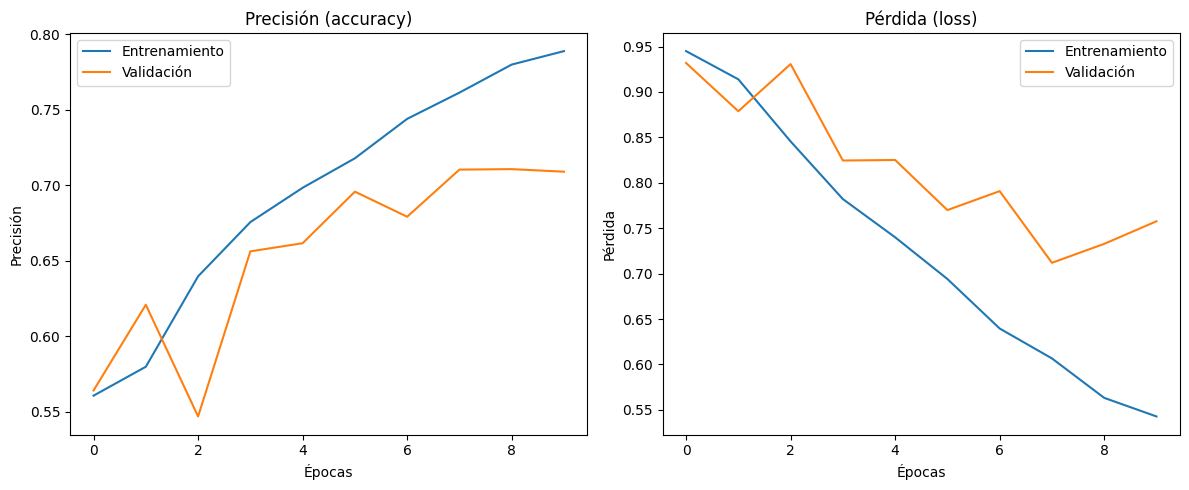

In [55]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Validación')
plt.title('Precisión (accuracy)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida (loss)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


# Conclusiòn previa

📊 Interpretación de las curvas


**Gràfico de Entrenamiento:** mejora progresivamente, alcanzando casi el 80%. 🟢
Validación: arranca bien, tiene altibajos, y se estabiliza alrededor del 71%.

**Gràfico de pèrdida (Loss):**

*  Entrenamiento: baja de forma constante (ideal).
*Validación: tiene oscilaciones, pero se mantiene en un rango decente (0.75 - 0.85).




✅ **Conclusión general:**No hay overfitting severo: Esto me dice que la brecha entre entrenamiento y validaciòn no se dispara.



# Matriz de confusiòn y reporte de clasificaciòn

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


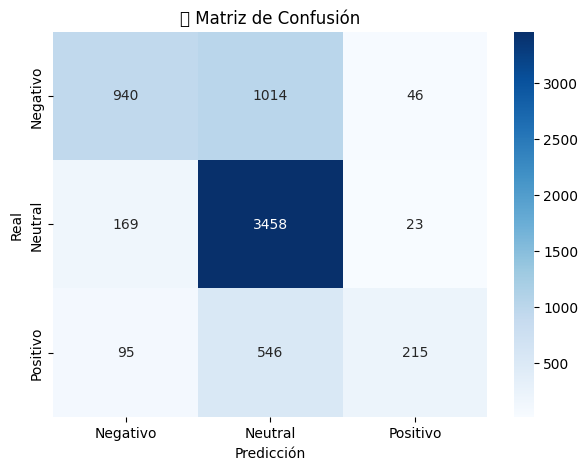

📄 Reporte de Clasificación:

              precision    recall  f1-score   support

    Negativo       0.78      0.47      0.59      2000
     Neutral       0.69      0.95      0.80      3650
    Positivo       0.76      0.25      0.38       856

    accuracy                           0.71      6506
   macro avg       0.74      0.56      0.59      6506
weighted avg       0.73      0.71      0.68      6506



In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Predicciones
y_pred_probs = modelo.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # clase con mayor probabilidad
y_true = np.argmax(y_test_cat, axis=1)

# 2️⃣ Etiquetas originales
etiquetas = label_encoder.classes_

# 3️⃣ Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("📊 Matriz de Confusión")
plt.show()

# 4️⃣ Reporte de clasificación
reporte = classification_report(y_true, y_pred, target_names=etiquetas)
print("📄 Reporte de Clasificación:\n")
print(reporte)


Observaciones:
✅ **Neutral **es la clase más fácil de predecir: muy alto recall y F1-score.

⚠️ **Negativo** tiene alta precisión pero bajo recall: el modelo acierta cuando predice que algo es negativo, pero no encuentra todos los negativos.

⚠️** Positivo** sigue siendo el más difícil: el modelo acierta poco cuando debería identificar un tweet positivo. Posiblemente por desbalance de clases y solapamiento léxico con "Neutral".

# Mejora del modelo con una capa Dropout:


Una capa de Dropout es una tècnica algo simple pero que parece poderosa para reducir el **Overfiting**. Esto en si lo que hace es "apagar" aleatoriamente algunas neuronas durante el train, lo q forza al modelo a generalizar mejor.

In [58]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout

# Creo el modelo mejorado
modelo_dropout = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    GlobalAveragePooling1D(),
    Dropout(0.5),  # 👈 OJO esta es la NUEVA capa Dropout (puede ajustarse entre 0.3 y 0.5)
    Dense(64, activation='relu'),
    Dense(num_clases, activation='softmax')
])

# Compiloooo
modelo_dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Entreno el modelo
historial_dropout = modelo_dropout.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test_cat),
    verbose=2
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
204/204 - 6s - 30ms/step - accuracy: 0.5608 - loss: 0.9520 - val_accuracy: 0.5633 - val_loss: 0.9372
Epoch 2/10
204/204 - 4s - 19ms/step - accuracy: 0.5653 - loss: 0.9344 - val_accuracy: 0.6010 - val_loss: 0.9226
Epoch 3/10
204/204 - 2s - 12ms/step - accuracy: 0.5961 - loss: 0.9022 - val_accuracy: 0.6279 - val_loss: 0.8650
Epoch 4/10
204/204 - 2s - 12ms/step - accuracy: 0.6409 - loss: 0.8551 - val_accuracy: 0.6600 - val_loss: 0.8159
Epoch 5/10
204/204 - 3s - 13ms/step - accuracy: 0.6725 - loss: 0.7969 - val_accuracy: 0.6700 - val_loss: 0.7929
Epoch 6/10
204/204 - 3s - 13ms/step - accuracy: 0.6885 - loss: 0.7610 - val_accuracy: 0.6686 - val_loss: 0.7877
Epoch 7/10
204/204 - 5s - 24ms/step - accuracy: 0.6993 - loss: 0.7340 - val_accuracy: 0.6884 - val_loss: 0.7571
Epoch 8/10
204/204 - 3s - 12ms/step - accuracy: 0.7240 - loss: 0.6869 - val_accuracy: 0.6811 - val_loss: 0.7726
Epoch 9/10
204/204 - 2s - 12ms/step - accuracy: 0.7398 - loss: 0.6511 - val_accuracy: 0.7100 - val_loss:

# Re corrida gràfica de Acurracy y pèrdida

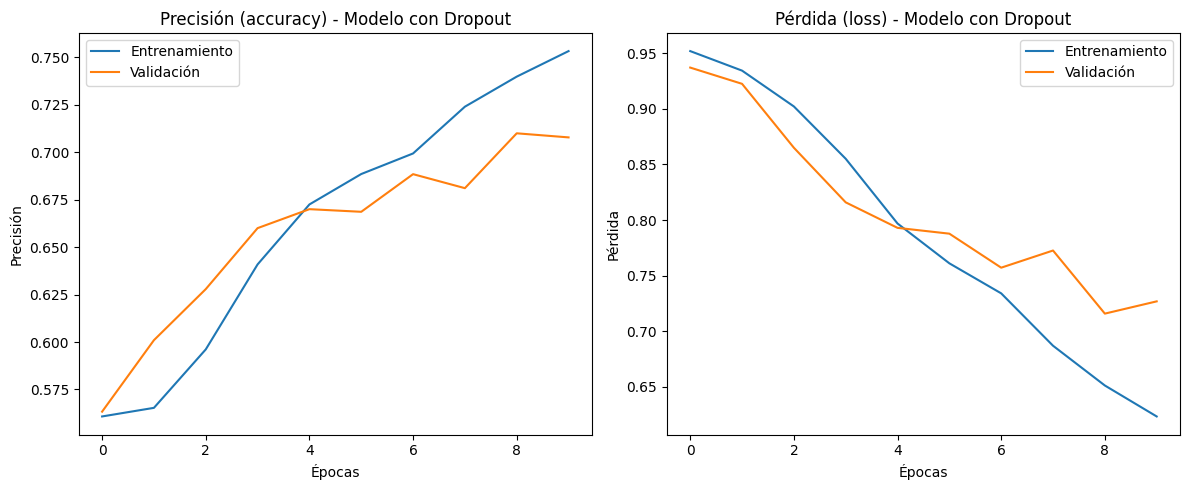

In [66]:
# Accuracy con Dropout
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(historial_dropout.history['accuracy'], label='Entrenamiento')
plt.plot(historial_dropout.history['val_accuracy'], label='Validación')
plt.title('Precisión (accuracy) - Modelo con Dropout')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(historial_dropout.history['loss'], label='Entrenamiento')
plt.plot(historial_dropout.history['val_loss'], label='Validación')
plt.title('Pérdida (loss) - Modelo con Dropout')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


# Re corrida de matriz de confusiòn luego de capa dropout

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


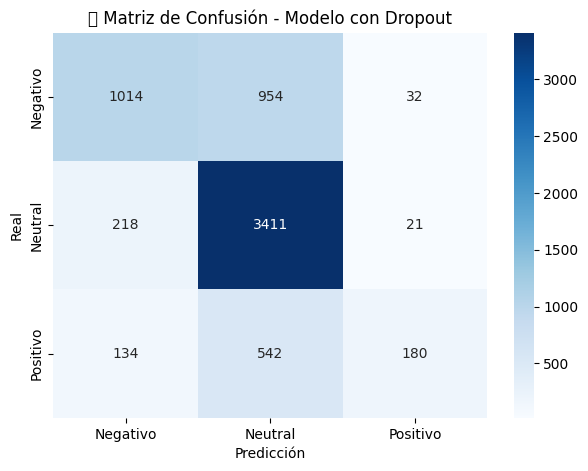

📄 Reporte de Clasificación- Modelo con Dropout:

              precision    recall  f1-score   support

    Negativo       0.74      0.51      0.60      2000
     Neutral       0.70      0.93      0.80      3650
    Positivo       0.77      0.21      0.33       856

    accuracy                           0.71      6506
   macro avg       0.74      0.55      0.58      6506
weighted avg       0.72      0.71      0.68      6506



In [68]:
# Predicciones con el nuevo modelo
y_pred_probs = modelo_dropout.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)


# 3️⃣ Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("📊 Matriz de Confusión - Modelo con Dropout")
plt.show()

# 4️⃣ Reporte de clasificación
reporte = classification_report(y_true, y_pred, target_names=etiquetas)
print("📄 Reporte de Clasificación- Modelo con Dropout:\n")
print(reporte)

Conclusiòn✅:

* **Accurracy:** : No tuvo variaciòn (se mantuvo igual en 0,71).

* **F1 macro**:Tuvo una ligera caìda de 0,59 a ,58.

Ahora, en cuanto a la matriz de confusiòn con Dropout:



***Negativo**: Mejoro el recall.


***Neutral**: Estuvo estable.

***Positivo**: Perdio cierto recall.

A mi parecer, se esta:

 ✅ganando mejor equilibrio entre train y test ( o entrenamiento y validaciòn).

 ✅ Precisiòn global un poco mas estable.

 ✅Menor riesgo de overfitting ( las curvas se ajustan mas parejo).

 Perooooo⚠️ el recall en positivo bajo un poco, no se por que.








En que me ayudo el modelo con dropout?

En que generaliza levemente mejor, mantiene el mismo accurracy y reduce un poco el overfiting, con curvas mas cuerdas.



# Cierre final

Se estuvieron realizando las siguientes fases a modo resùmen:

-**🔁 Fase 0 – ETL: Extracción, Transformación y Carga**

El proceso comenzó con la obtención de un dataset de más de 465,000 tweets relacionados con las elecciones de 2025, Musk y Trump (picantico).
Se realizó un filtrado por idioma para quedarnos únicamente con tweets en español (32,477 entradas maso).
A continuación, se aplicaron transformaciones como:

Eliminación de columnas irrelevantes o vacías
Selección de columnas clave (text, retweets, likes, seguidores, etc.)
Limpieza textual: eliminación de menciones, URLs, símbolos, puntuación y stopwords
Normalización semántica: conversión a minúsculas y filtrado de palabras repetitivas o poco informativas
Este proceso permitió dejar el texto listo para su análisis y modelado.


📌 **Fase 1 – Procesamiento de Lenguaje Natural (NLP)**


Se aplicaron técnicas de análisis de sentimiento con librerías como VADER y TextBlob para obtener una visión inicial.


Se generaron nubes de palabras por tipo de sentimiento para detectar temas dominantes.


Se visualizó la frecuencia de palabras por clase emocional (barplot) y se observó la presencia de términos polarizantes como “nazi”, “saludo” o “musk”.


Se filtraron términos irrelevantes para una interpretación más precisa del contenido emocional.

🧠 **Fase 2 – Modelado con Deep Learning**
Entrené una red neuronal utilizando TensorFlow/Keras, con una arquitectura simple:

Embedding → GlobalAveragePooling → Dense → Softmax

Se usaron secuencias tokenizadas y padding fijo (max_len = 100)
Las etiquetas (Positivo, Negativo, Neutral) fueron codificadas y balanceadas parcialmente


El modelo logró un **accuracy del 71% **y buenos resultados en la clase Neutral


**✔ Mejora aplicada:**
Se agregó una capa Dropout para reducir el overfitting.
Aunque la precisión general se mantuvo, el modelo mostró mejor equilibrio entre entrenamiento y validación.

# Reflexiòn final

Este proyecto fue exportado de una DB de Kaglee, donde aplique el pipeline de NLP (procesamiento natural de lenguaje) + Deep learning, desde la limpieza del dataset hasta la interpretaciòn de los resultados.


Genero buenos niveles de precisiòn, aunque no excelentes, sobretodo en los positivos, pero que a mi parecer es bueno colocar foco en los negativos.

